In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
#Importing the csv file and reading onto a pandas dataframe
pth=r"C:\Users\Sujai\Desktop\Upgrad_docs\loan\loan.csv"
df=pd.read_csv(pth)

C:\Users\Sujai\AppData\Local\Temp\ipykernel_16560\3433513100.py:3: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(pth)


In [6]:

#The unique values clearly denote that there are no missing values and all the values are standard i.e there are no random values
unique_emp_lengths = df['loan_status'].unique()
print(unique_emp_lengths)


['Fully Paid' 'Charged Off' 'Current']


In [7]:
#Counts to check category and distribution of types of loan_status

loan_status_counts = df['loan_status'].value_counts()
print(loan_status_counts)

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64


In [17]:
df["loan_status"].describe()

count          39717
unique             3
top       Fully Paid
freq           32950
Name: loan_status, dtype: object

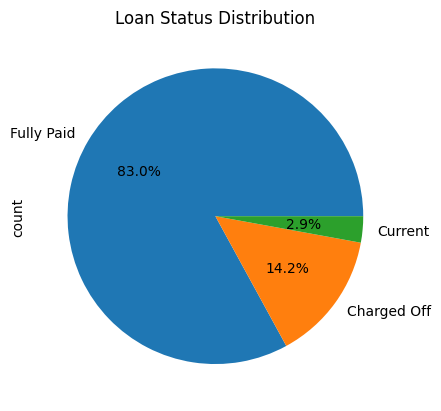

In [16]:
#Visual representation of proportion of loans that are fully paid, current and charged off using pie chart
loan_status_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Loan Status Distribution')
plt.show()

In [119]:
#Checking the data quality of te column term
def unique_check(df):
    return(df.unique())

def null_check(df): 
    return(df.isnull().sum())

def value_count(df):
    return(df.value_counts())

def pivot_df(df,ind,col):
    return(df.pivot_table(index=ind, columns=col, aggfunc='size', fill_value=0))

def pivot_plot(plot_df,x_axis,y_axis,title):
    terms = plot_df.index.to_numpy()
    fully_paid_pct = plot_df['fully_paid_pct'].to_numpy()
    charged_off_pct = plot_df['charged_off_pct'].to_numpy()

    # Create bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(terms, fully_paid_pct, label='Fully Paid', width=0.4, align='center')
    plt.bar(terms, charged_off_pct, label='Charged Off', width=0.4, align='edge')
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(title)
    plt.xticks(rotation=0)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


def pct_dist(df):
    # Calculate total loans for each term
    df['total'] = df.sum(axis=1)

# Calculate percentages
    df['fully_paid_pct'] = (df['Fully Paid'] / df['total']) * 100
    df['charged_off_pct'] = (df['Charged Off'] / df['total']) * 100
    return df


In [ ]:
unique_check(df["term"])

In [85]:
value_count(df["term"])

term
36 months    29096
60 months    10621
Name: count, dtype: int64

In [96]:
#loan_status_counts = df.pivot_table(index='term', columns='loan_status', aggfunc='size', fill_value=0)
loan_status_counts=pivot_df(df,'term','loan_status')
loan_status_counts
#print(loan_status_counts)

loan_status,Charged Off,Current,Fully Paid
term,,,
36 months,3227,0,25869
60 months,2400,1140,7081


In [97]:
pct_dist(loan_status_counts)

loan_status,Charged Off,Current,Fully Paid,total,fully_paid_pct,charged_off_pct
term,,,,,,
36 months,3227,0,25869,29096,88.909128,11.090872
60 months,2400,1140,7081,10621,66.669805,22.596742


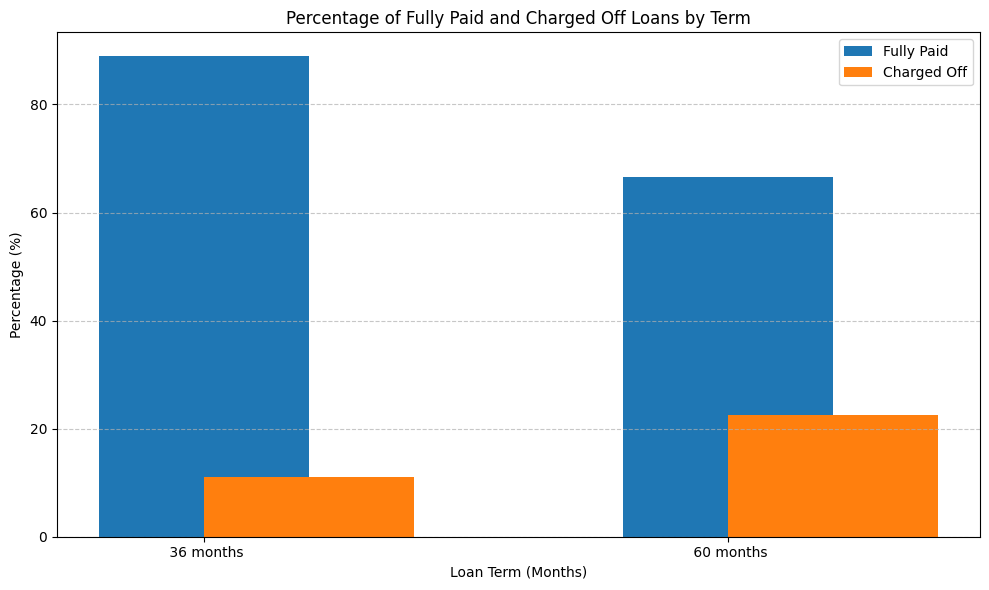

In [98]:
pivot_plot(loan_status_counts,'Loan Term (Months)','Percentage (%)','Percentage of Fully Paid and Charged Off Loans by Term')

In [102]:
null_check(df["int_rate"])

np.int64(0)

In [39]:
df["int_rate"].head(5)
df["int_rate"]=df['int_rate'].str.extract(r'(\d+)').astype(int)

In [103]:
int_rate_counts=pivot_df(df,'int_rate','loan_status')
print(int_rate_counts)

loan_status  Charged Off  Current  Fully Paid
int_rate                                     
5                     55        0        1275
6                    119        2        2366
7                    256       13        3956
8                    155       27        1626
9                    214       33        2045
10                   485      101        3772
11                   612      132        3725
12                   525      116        2812
13                   639       94        3283
14                   477       88        2184
15                   511       73        1982
16                   478       84        1469
17                   365      107         949
18                   230       75         612
19                   210       93         420
20                   147       53         282
21                    78       19         106
22                    56       23          61
23                    13        6          23
24                     2        1 

In [104]:
pct_dist(int_rate_counts)

loan_status,Charged Off,Current,Fully Paid,total,fully_paid_pct,charged_off_pct
int_rate,,,,,,
5,55,0,1275,1330,95.864662,4.135338
6,119,2,2366,2487,95.134700,4.784881
7,256,13,3956,4225,93.633136,6.059172
8,155,27,1626,1808,89.933628,8.573009
9,214,33,2045,2292,89.223386,9.336824
10,485,101,3772,4358,86.553465,11.128958
11,612,132,3725,4469,83.351980,13.694339
12,525,116,2812,3453,81.436432,15.204170
13,639,94,3283,4016,81.748008,15.911355


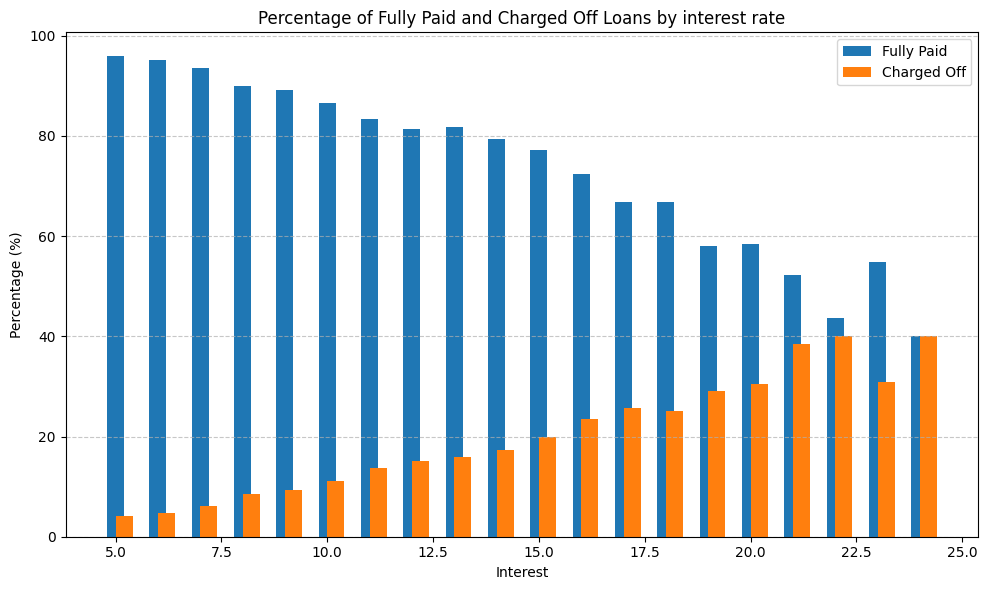

In [67]:
pivot_plot(int_rate_counts,'Interest','Percentage (%)','Percentage of Fully Paid and Charged Off Loans by interest rate')

In [78]:
df_int23=df[df['int_rate']==23]

print(df_int23[["loan_amnt","loan_status"]])

       loan_amnt  loan_status
223        24250   Fully Paid
540        13000      Current
601        12375  Charged Off
733        24925   Fully Paid
1156       29100   Fully Paid
1199       18250      Current
1691       35000  Charged Off
2075       21575   Fully Paid
2447       26300  Charged Off
2603       35000  Charged Off
2749       30000  Charged Off
2801       14825  Charged Off
3006       35000  Charged Off
3017        5700   Fully Paid
3094       30000  Charged Off
3655       25000   Fully Paid
4214       23200  Charged Off
4314       18400  Charged Off
4652       20000      Current
4873       12800   Fully Paid
5267       20000   Fully Paid
5284       25875      Current
5570       27300   Fully Paid
5820       17625  Charged Off
5966       35000   Fully Paid
6456       29700   Fully Paid
7446       32000      Current
7458       18000      Current
7466       30000   Fully Paid
7910       35000   Fully Paid
8305       22250   Fully Paid
9854       13650  Charged Off
10380     

In [105]:
null_check(df["application_type"])

np.int64(0)

In [108]:
unique_check(df["application_type"])

array(['INDIVIDUAL'], dtype=object)

In [109]:
null_check(df["home_ownership"])

np.int64(0)

In [110]:
unique_check(df["home_ownership"])

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [111]:
home_ownership_count=pivot_df(df,'home_ownership','loan_status')
home_ownership_count

loan_status,Charged Off,Current,Fully Paid
home_ownership,,,
MORTGAGE,2327,638,14694
NONE,0,0,3
OTHER,18,0,80
OWN,443,83,2532
RENT,2839,419,15641


In [112]:
pct_dist(home_ownership_count)

loan_status,Charged Off,Current,Fully Paid,total,fully_paid_pct,charged_off_pct
home_ownership,,,,,,
MORTGAGE,2327,638,14694,17659,83.209695,13.177417
NONE,0,0,3,3,100.000000,0.000000
OTHER,18,0,80,98,81.632653,18.367347
OWN,443,83,2532,3058,82.799215,14.486593
RENT,2839,419,15641,18899,82.760993,15.021959


In [116]:
purpose_count=pivot_df(df,"purpose","loan_status")
purpose_count

loan_status,Charged Off,Current,Fully Paid
purpose,,,
car,160,50,1339
credit_card,542,103,4485
debt_consolidation,2767,586,15288
educational,56,0,269
home_improvement,347,101,2528
house,59,14,308
major_purchase,222,37,1928
medical,106,12,575
moving,92,7,484


In [117]:
pct_dist(purpose_count)

loan_status,Charged Off,Current,Fully Paid,total,fully_paid_pct,charged_off_pct
purpose,,,,,,
car,160,50,1339,1549,86.442866,10.329245
credit_card,542,103,4485,5130,87.426901,10.565302
debt_consolidation,2767,586,15288,18641,82.012768,14.843624
educational,56,0,269,325,82.769231,17.230769
home_improvement,347,101,2528,2976,84.946237,11.659946
house,59,14,308,381,80.839895,15.485564
major_purchase,222,37,1928,2187,88.157293,10.150892
medical,106,12,575,693,82.972583,15.295815
moving,92,7,484,583,83.018868,15.780446


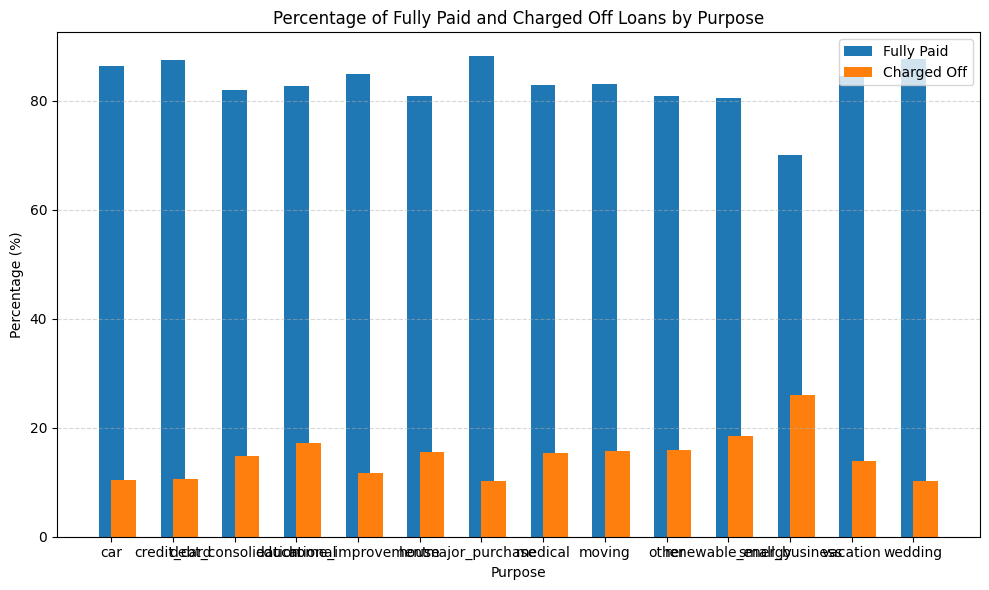

In [120]:
pivot_plot(purpose_count,'Purpose','Percentage (%)','Percentage of Fully Paid and Charged Off Loans by Purpose')

In [125]:
unique_check(df["verification_status"])

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [126]:
null_check(df["verification_status"])

np.int64(0)

In [127]:
verification_count=pivot_df(df,"verification_status","loan_status")
verification_count

loan_status,Charged Off,Current,Fully Paid
verification_status,,,
Not Verified,2142,227,14552
Source Verified,1434,310,8243
Verified,2051,603,10155


In [128]:
pct_dist(verification_count)

loan_status,Charged Off,Current,Fully Paid,total,fully_paid_pct,charged_off_pct
verification_status,,,,,,
Not Verified,2142,227,14552,16921,85.999645,12.658826
Source Verified,1434,310,8243,9987,82.537298,14.358666
Verified,2051,603,10155,12809,79.280194,16.012179


In [135]:
null_check(df["pub_rec"])

np.int64(0)

In [136]:
unique_check(df["pub_rec"])

array([0, 1, 2, 3, 4])

In [133]:
pub_rec_count=pivot_df(df,"pub_rec","loan_status")
pub_rec_count

loan_status,Charged Off,Current,Fully Paid
pub_rec,,,
0,5160,1094,31347
1,457,43,1556
2,10,3,38
3,0,0,7
4,0,0,2


In [134]:
pct_dist(pub_rec_count)

loan_status,Charged Off,Current,Fully Paid,total,fully_paid_pct,charged_off_pct
pub_rec,,,,,,
0,5160,1094,31347,37601,83.367464,13.723039
1,457,43,1556,2056,75.680934,22.227626
2,10,3,38,51,74.509804,19.607843
3,0,0,7,7,100.000000,0.000000
4,0,0,2,2,100.000000,0.000000


In [ ]:
pivot_plot(pub_rec_count,'Purpose','Percentage (%)','Percentage of Fully Paid and Charged Off Loans by Purpose')